In [78]:
import pandas as pd 
import numpy as np
import sklearn.metrics as met
import sklearn.ensemble as sk
from sklearn import tree as dec
from sklearn import preprocessing,cross_validation,neighbors,metrics,cluster
from sklearn import datasets, svm, cross_validation, tree, preprocessing, metrics
from sklearn.cross_validation import train_test_split,cross_val_predict,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,roc_auc_score,classification_report
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('train.csv')
Y=pd.read_csv('test.csv')
Y_true=pd.read_csv('gender_submission.csv')

In [3]:
Y_true=Y_true['Survived']

In [ ]:
Y.dtypes

In [4]:
Test=(Y.dtypes[Y.dtypes!=object].index)

In [5]:
Test_data=Y[Test]

In [6]:
Test_data.isnull().sum()

PassengerId     0
Pclass          0
Age            86
SibSp           0
Parch           0
Fare            1
dtype: int64

In [7]:
Test_data['Age'].mean()
Test_data['Age'].median()

27.0

In [8]:
Age_box=df[pd.notnull(df['Age'])]

{'boxes': [<matplotlib.lines.Line2D at 0x103912898>],
 'caps': [<matplotlib.lines.Line2D at 0x10391dc18>,
 'fliers': [<matplotlib.lines.Line2D at 0x10392fb70>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x103929c88>],
 'whiskers': [<matplotlib.lines.Line2D at 0x101824d30>,
  <matplotlib.lines.Line2D at 0x10391da90>]}

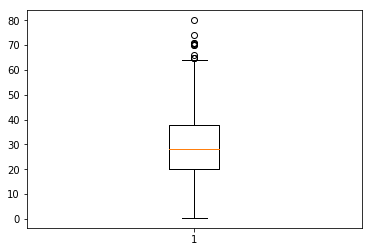

In [9]:
plt.boxplot(Age_box['Age'])

In [10]:
Test_data['Age'].fillna(Test_data['Age'].median(),inplace=True)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/pandas/core/generic.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [11]:
Test_data.Age.isnull().any()

False

In [12]:
Test_data['Fare'].median()
Test_data['Fare'].mean()

35.627188489208635

In [13]:
fare_box=df[pd.notnull(df['Fare'])]

In [14]:
Test_data['Fare'].fillna(Test_data['Fare'].median(),inplace=True)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/pandas/core/generic.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [15]:
df.shape

(891, 12)

In [ ]:
df['Age'].value_counts().hist()

In [16]:
#Since mean and median are almost similar ,we can choose mean in the dataset
df['Age'].median()

28.0

In [17]:
df.Age.fillna(df['Age'].mean(),inplace=True)

In [18]:
df['Age'].isnull().sum()

0

In [19]:
No_objects=list(df.dtypes[df.dtypes!=object].index)

In [20]:
train_clean=df[No_objects]


In [21]:
train_y=train_clean['Survived']

In [22]:
del train_clean['Survived']

In [27]:
model=sk.RandomForestClassifier(n_estimators=15,oob_score=True,random_state=42)

In [28]:
model.fit(train_clean,train_y)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/ensemble/forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=15, n_jobs=1, oob_score=True, random_state=42,
            verbose=0, warm_start=False)

In [29]:
Y_pred=model.predict(Test_data)

In [30]:
Y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0,

In [ ]:
met.confusion_matrix(Y_true, Y_pred)

In [ ]:
met.accuracy_score(Y_true, Y_pred)

In [ ]:
model.oob_score_

In [ ]:
y_oob=model.oob_score_


In [ ]:
met.roc_auc_score(Y_pred,Y_pred)

In [31]:
# now lets include the categorical variables also to see the effect of the model 
df1=df

In [32]:
df1.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
Y.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [33]:
def cabin(x):
    try:
        return x[0]
    except TypeError:
        return 'Missing'
Y['Cabin']=Y['Cabin'].apply(cabin)
df1['Cabin']=df1['Cabin'].apply(cabin)

In [34]:
Categorical_variable=['Sex','Cabin','Embarked']
for var in Categorical_variable:
    df1[var].fillna('Missing',inplace=True)
    dummies=pd.get_dummies(df1[var],prefix=var)
    df1=pd.concat([df1,dummies],axis=1)
    df1.drop([var],axis=1,inplace=True)
    Y[var].fillna('Missing',inplace=True)
    dummiess=pd.get_dummies(Y[var],prefix=var)
    Y=pd.concat([Y,dummiess],axis=1)
    Y.drop([var],axis=1,inplace=True)

In [35]:

df1['Age'].fillna(df1['Age'].median(),inplace=True)
df1['Fare'].fillna(df1['Fare'].median(),inplace=True)

In [36]:
Y['Age'].fillna(Y['Age'].median(),inplace=True)
Y['Fare'].fillna(Y['Fare'].median(),inplace=True)

In [37]:
df1

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_Missing,Cabin_T,Embarked_C,Embarked_Missing,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1,3,26.000000,0,0,7.9250,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1,1,35.000000,1,0,53.1000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,3,35.000000,0,0,8.0500,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5,0,3,29.699118,0,0,8.4583,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6,0,1,54.000000,0,0,51.8625,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0,3,2.000000,3,1,21.0750,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8,1,3,27.000000,0,2,11.1333,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9,1,2,14.000000,1,0,30.0708,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [38]:
train_Y=df1['Survived']
del df1['Survived']
train_X=df1

In [11]:
del df1['Embarked_Missing']
del df1['Cabin_T']

In [37]:
# Random Forest Classifier
model=sk.RandomForestClassifier(n_estimators=30,oob_score=True,random_state=43,max_features=18)

In [38]:
model.fit(train_X,train_Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=18, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=30, n_jobs=1, oob_score=True, random_state=43,
            verbose=0, warm_start=False)

In [39]:
y_predicted=model.predict(Y)

In [40]:
y_predicted.shape

(418,)

In [41]:
met.confusion_matrix(Y_true, y_predicted)

array([[234,  32],
       [ 36, 116]])

In [42]:
met.accuracy_score(Y_true, y_predicted)

0.83732057416267947

In [43]:
model.oob_score_

0.80808080808080807

In [79]:
# Decision Tree Classifier 
model1=dec.DecisionTreeClassifier(criterion='gini')

In [80]:
model1.fit(train_X,train_Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [81]:
y_predic=model1.predict(Y)

ValueError: Number of features of the model must match the input. Model n_features is 21 and input n_features is 18 

In [46]:
#KNN CLASSIFIER
k_range=range(1,30)
k_score=[]
for i in k_range:
    clf = neighbors.KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(clf,train_X , train_Y, cv=10,scoring='accuracy')
    k_score.append(scores.mean())
print(k_score)

[0.71618658495062992, 0.7184839972761321, 0.73421461809102251, 0.72188060379071628, 0.7297208035410282, 0.71169163545568037, 0.7196203609124957, 0.69493814549994326, 0.70727272727272728, 0.70839575530586774, 0.70618630121439119, 0.69718420156622407, 0.70618630121439119, 0.70056803995006245, 0.70844597662013398, 0.70837021904437647, 0.71515009647032124, 0.70956900465327422, 0.71064209510838727, 0.71296475995914199, 0.70618516626943595, 0.71855805243445692, 0.71184144818976292, 0.71296475995914199, 0.70396322778345244, 0.70286488480308706, 0.70174128929746904, 0.7028401997503122, 0.6972463398025196]


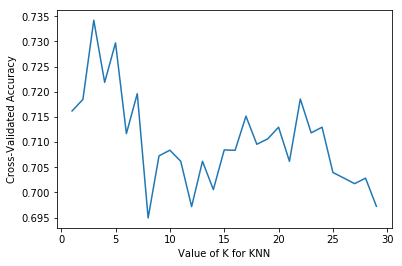

In [47]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_score)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [50]:
scores = cross_val_score(clf, train_X, train_Y, cv=10,scoring='accuracy')
scores.mean()

0.6972463398025196

In [51]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=9)
bestresult = neighbors.KNeighborsClassifier(n_neighbors=10)
bestresult.fit(X_train,y_train)
bestresult.score(X_test,y_test)

0.68156424581005581

In [52]:
y_pred=bestresult.predict(X_test)

In [53]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0])

In [54]:
print(metrics.confusion_matrix(y_test,y_pred))

[[90 10]
 [47 32]]


In [57]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.66      0.90      0.76       100
          1       0.76      0.41      0.53        79

avg / total       0.70      0.68      0.66       179



In [58]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=2)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/metrics/ranking.py:542: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [59]:
roc_auc_score(y_test, y_pred)

0.65253164556962029

In [67]:
# Logistic Regression 
logreg = LogisticRegression()
print(cross_val_score(logreg, train_X, train_Y, cv=10, scoring='accuracy').mean())

0.800244580638


In [68]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(train_X,train_Y,test_size=0.2)

In [71]:
clf_dt = tree.DecisionTreeClassifier(max_depth=10)

In [72]:
clf_dt.fit (X_train, y_train)
clf_dt.score (X_test, y_test)


0.7988826815642458

In [70]:
# K means algorithm
KMeans_Train_data=train_X

In [71]:

clf = cluster.KMeans(n_clusters=2)
clf.fit(KMeans_Train_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [72]:
KMeans_Train_data['labels']=clf.labels_

In [73]:
met.confusion_matrix(train_Y,KMeans_Train_data['labels'])

array([[535,  14],
       [303,  39]])

In [74]:
print(classification_report(train_Y,KMeans_Train_data['labels']))

             precision    recall  f1-score   support

          0       0.64      0.97      0.77       549
          1       0.74      0.11      0.20       342

avg / total       0.68      0.64      0.55       891



In [75]:
met.accuracy_score(train_Y,KMeans_Train_data['labels'])

0.64421997755331084